In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Checking Null values

In [3]:
df.isnull().sum().any()

False

We see that there are no null values.

### EDA

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

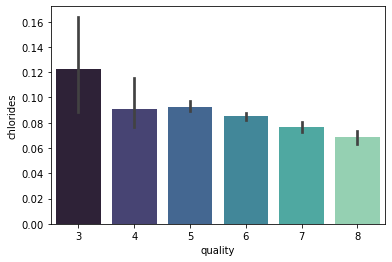

In [4]:
sns.barplot(x=df['quality'],y=df['chlorides'],palette='mako')

We see that the wine quality decreases with the increase in Chlorides

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

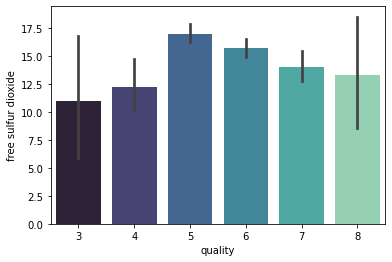

In [5]:
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'],palette='mako')

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

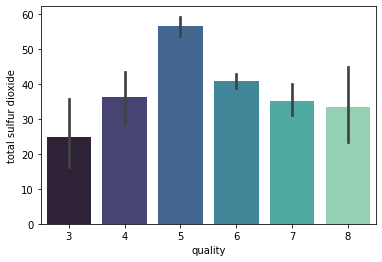

In [6]:
sns.barplot(x=df['quality'],y=df['total sulfur dioxide'],palette='mako')

<AxesSubplot:xlabel='quality', ylabel='density'>

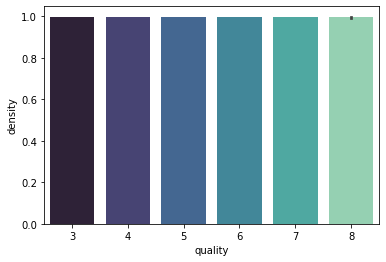

In [7]:
sns.barplot(x=df['quality'],y=df['density'],palette='mako')

From the above plot we see that the density does not have much effect on wine quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

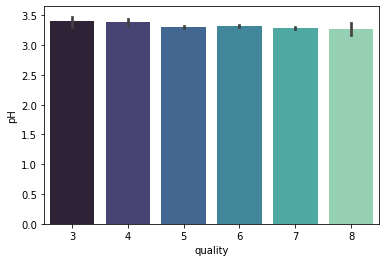

In [8]:
sns.barplot(x=df['quality'],y=df['pH'],palette='mako')

We see as pH has a very slight effect on wine quality and the quality increases marginally with decrease in pH

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

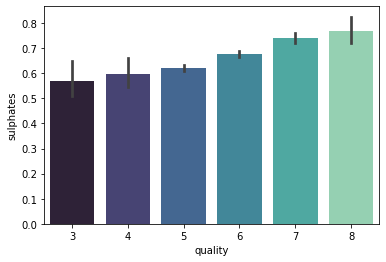

In [9]:
sns.barplot(x=df['quality'],y=df['sulphates'],palette='mako')

Wine quality clearly increases with the increase in sulphate level.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

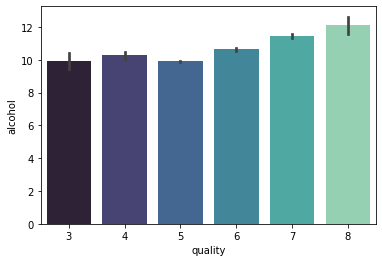

In [10]:
sns.barplot(x=df['quality'],y=df['alcohol'],palette='mako')

Wine quality increases with increase in alcohol level

<AxesSubplot:xlabel='quality', ylabel='count'>

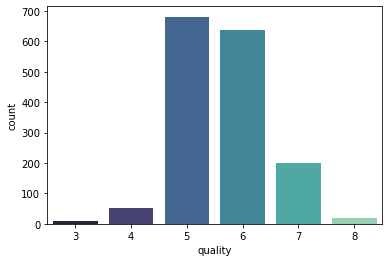

In [11]:
sns.countplot(df['quality'],palette='mako')

Wine quality is divided into 6 parts starting from 3 going upto 8.Wine quality 5 has the highest count in the dataset followed by 6 and 7. We have very few varriables with quality 3 and 8.

##### As the classification has to be into 2 good and not good, lets divide the data into 2(Binary Classification) parts rather than 6.

In [12]:
df['quality']=df['quality'].map({3:0,4:0,5:0,6:0,7:1,8:1})
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [13]:
df['quality'].unique()

array([0, 1], dtype=int64)

0    1382
1     217
Name: quality, dtype: int64

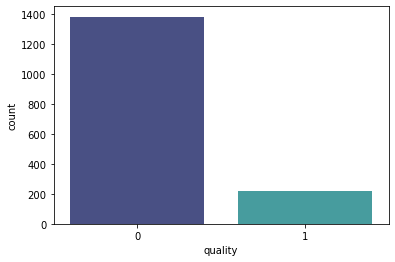

In [14]:
sns.countplot(df['quality'],palette='mako')
df['quality'].value_counts()

After dividing the wine quality into 2 parts 7 and above as Good or 1 and below 7 as not good or 0, we see that the data is highly imbalanced. We have 217 records for Good wine and 1382 for not good, which is roughly 13.5% of data is Good Quality Wine and 84.5% is Not Good Wine hence we'd have to balance the dataset

### Correlation

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


In [16]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

<AxesSubplot:>

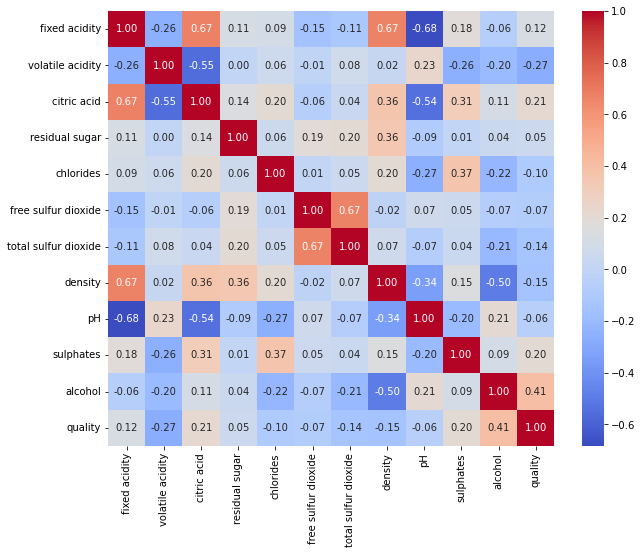

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

##### Outcome of Correlation

Columns of the dataset are both positively and negitively correlated with target column.

alcohol (0.407315) has the strongest correlation followed by citric acid (0.214716) and sulphates (0.199485), volatile acidity (-0.270712) has the strongest negitive correlation.
residual sugar (0.047779),pH (-0.057283),free sulfur dioxide (-0.071747) and chlorides (-0.097308) have a weak correlation of less than 10% with target variable

##### Maximum Correlation : alcohol 41%
##### Min. Correlation : residual sugar 4%

### Checking Distribution

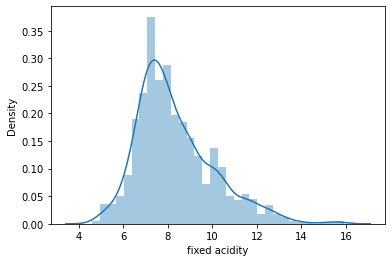

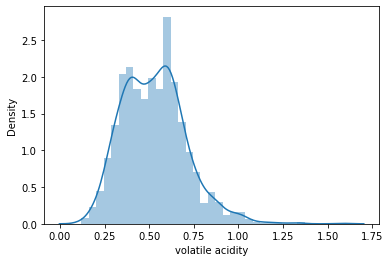

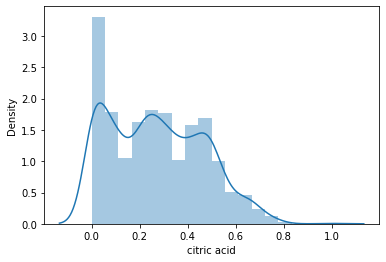

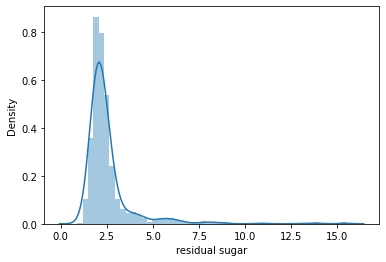

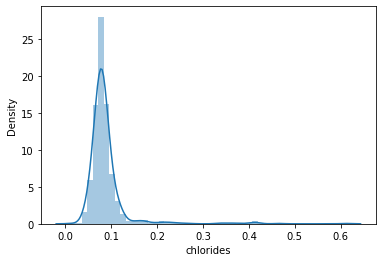

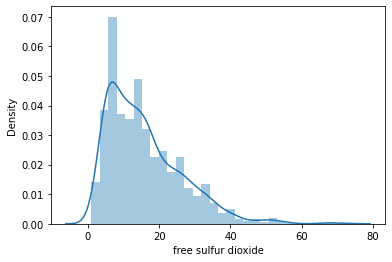

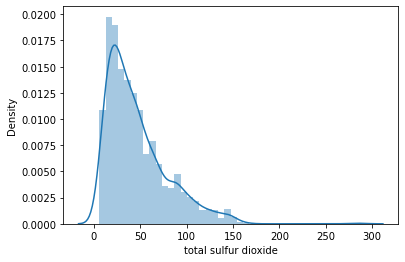

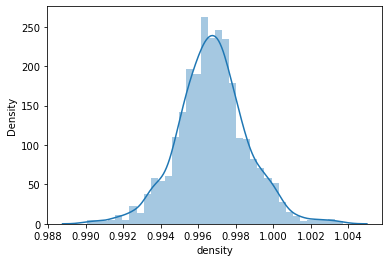

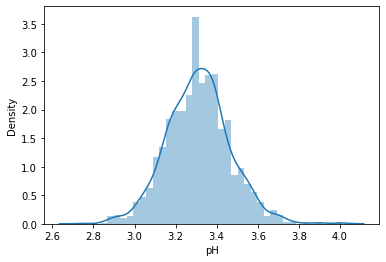

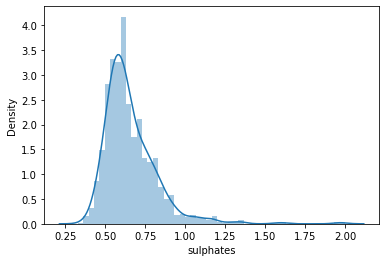

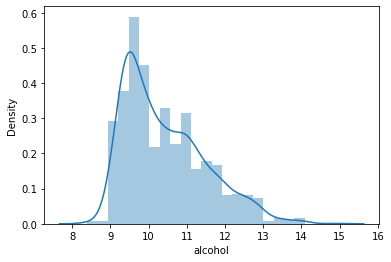

In [18]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for i in columns:
    sns.distplot(df[i])
    plt.show()

In [19]:
df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
quality                 2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

We see that there is skewness present in multiple columns. Lets set the threshold for skewness as +/-0.5

#### Checking for Outliers

<AxesSubplot:>

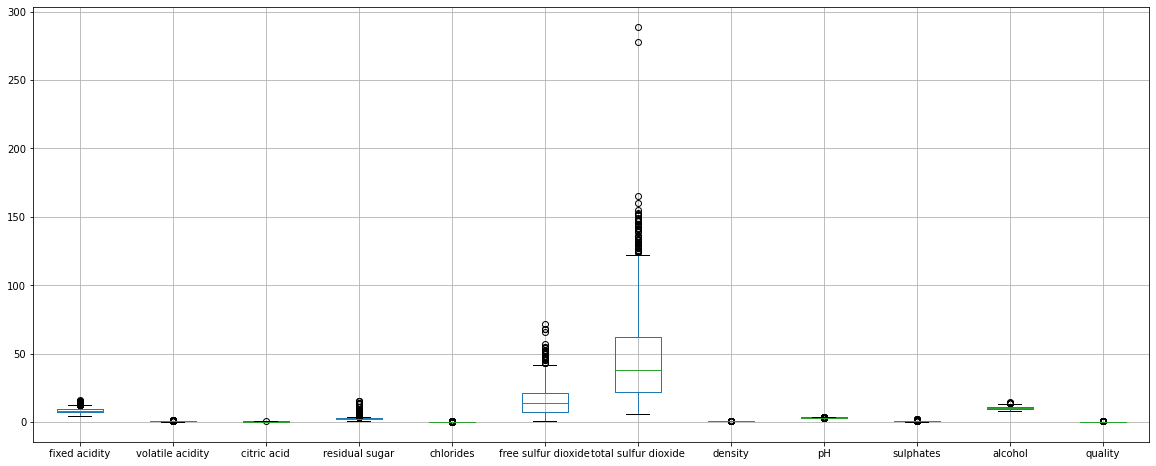

In [20]:
df.boxplot(figsize=(20,8))
plt.subplot()

In [21]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                  True
dtype: bool

From the graph and zscore, we see that all the features have outliers, leaving the target apart

### Data Cleaning

In [22]:
delete = pd.DataFrame([['04.77','residual sugar','4.54','Alot'],['05.72','pH ','0.19','Alot'],['09.73','chlorides','5.68','Few']],columns=['Corr','Feature','Skewness','Outliers'])
delete

,Corr,Feature,Skewness,Outliers
0,04.77,residual sugar,4.54,Alot
1,05.72,pH,0.19,Alot
2,09.73,chlorides,5.68,Few


Since residual sugar has very low correlation high skewness and outlers, we could drop this feature

In [23]:
df.drop('residual sugar',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Removing Outliers

In [24]:
z = np.abs(zscore(df))
z.shape

(1599, 12)

In [25]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(1458, 12)

### Percentage Data loss

In [26]:
percentage_loss = (1599-1458)/1599*100
percentage_loss

8.818011257035648

## Dataset with outliers is df and Dataset without outliers is df_new

## Lets work on Dataset without outliers

In [27]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [29]:
dfx = df_new.iloc[:,:-1]
dfx.shape

(1458, 11)

In [30]:
dfy = df_new['quality']
dfy.shape

(1458,)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE()
x,y = sm.fit_resample(dfx,dfy)

In [33]:
x.shape

(2514, 11)

In [34]:
y.shape

(2514,)

<AxesSubplot:xlabel='quality', ylabel='count'>

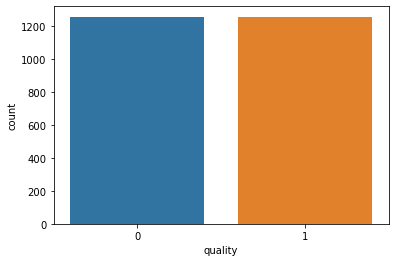

In [35]:
sns.countplot(y)

The data is balanced

In [36]:
x.skew().sort_values(ascending=False)

residual sugar          2.214688
chlorides               2.205886
total sulfur dioxide    1.412605
free sulfur dioxide     1.072167
volatile acidity        0.684564
fixed acidity           0.467537
sulphates               0.427433
pH                      0.270011
alcohol                 0.172542
density                 0.129320
citric acid            -0.060804
dtype: float64

##### Normalizing the data using power_transform

In [38]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [39]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.633823,1.347514,-1.645165,-0.696429,0.011656,-0.101212,0.166564,0.0,1.471227,-0.985549,-1.422142
1,-0.365917,2.046145,-1.645165,0.540422,1.130941,1.195445,1.164006,0.0,-0.757668,0.017377,-1.007309
2,-0.365917,1.600440,-1.437261,0.106622,0.865536,0.381046,0.851119,0.0,-0.292422,-0.219130,-1.007309
3,1.477866,-1.308025,1.294310,-0.696429,-0.049793,0.578558,1.004472,0.0,-1.077790,-0.807378,-1.007309
4,-0.633823,1.347514,-1.645165,-0.696429,0.011656,-0.101212,0.166564,0.0,1.471227,-0.985549,-1.422142
...,...,...,...,...,...,...,...,...,...,...,...
2509,-0.014610,0.090609,-0.056437,0.937016,-0.726319,-0.278063,-0.114789,0.0,0.155032,-0.351677,0.334285
2510,0.115627,-0.960652,0.992267,1.557188,0.784762,-0.101212,-0.359403,0.0,-0.194846,0.096701,1.066674
2511,0.774829,-0.149785,-0.255833,0.525192,0.880398,0.690230,0.682184,0.0,-0.421222,1.694336,-0.228272
2512,0.273125,-0.939762,0.522763,0.613974,1.358174,-0.780533,-0.979989,0.0,-0.021896,0.718096,0.912993


### Scaling the model

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-0.63382336,  1.34751389, -1.64516525, ...,  1.47122711,
        -0.98554913, -1.4221423 ],
       [-0.36591735,  2.04614538, -1.64516525, ..., -0.75766775,
         0.01737658, -1.00730879],
       [-0.36591735,  1.60044004, -1.43726135, ..., -0.29242194,
        -0.21913013, -1.00730879],
       ...,
       [ 0.77482863, -0.14978515, -0.25583271, ..., -0.42122193,
         1.69433579, -0.2282721 ],
       [ 0.27312482, -0.93976238,  0.52276278, ..., -0.02189556,
         0.71809573,  0.91299299],
       [-0.77313169, -0.64085691,  0.76531454, ...,  0.72804895,
         1.2072237 ,  0.13839853]])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc> max_accuracy:
        max_accuracy = acc
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.8767395626242545 for random_state 43


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=43)
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.8767395626242545
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       241
           1       0.88      0.88      0.88       262

    accuracy                           0.88       503
   macro avg       0.88      0.88      0.88       503
weighted avg       0.88      0.88      0.88       503



In [46]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv = cross_val_score(lr,X,y,cv=j)
    cv_score = cv.mean()
    print('at', j, 'Cross Validation score is', cv_score*100 ,'and accuracy score is 87.67')

at 2 Cross Validation score is 79.75338106603023 and accuracy score is 87.67
at 3 Cross Validation score is 81.5035799522673 and accuracy score is 87.67
at 4 Cross Validation score is 82.61451550838963 and accuracy score is 87.67
at 5 Cross Validation score is 82.37871575328903 and accuracy score is 87.67
at 6 Cross Validation score is 82.2593476531424 and accuracy score is 87.67
at 7 Cross Validation score is 82.7743511517885 and accuracy score is 87.67
at 8 Cross Validation score is 82.45526235972096 and accuracy score is 87.67
at 9 Cross Validation score is 82.65531660692952 and accuracy score is 87.67


In [65]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=43)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    cv = cross_val_score(model,X,y,cv=9)
    cv_score = cv.mean()
    print('Report for ', model)
    print('The Accuracy score is', accuracy)
    print(classification_report(y_test,pred))
    print('The Cross-Validation Score is', cv_score)

In [66]:
Model(lr)

Report for  LogisticRegression()
The Accuracy score is 0.8300180831826401
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       256
           1       0.85      0.84      0.84       297

    accuracy                           0.83       553
   macro avg       0.83      0.83      0.83       553
weighted avg       0.83      0.83      0.83       553

The Cross-Validation Score is 0.8295848198128328


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
Model(dt)

Report for  DecisionTreeClassifier()
The Accuracy score is 0.8842676311030742
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       256
           1       0.89      0.89      0.89       297

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.88      0.88      0.88       553

The Cross-Validation Score is 0.8686504411260112


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)

Report for  RandomForestClassifier()
The Accuracy score is 0.9330922242314648
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       256
           1       0.92      0.96      0.94       297

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553

The Cross-Validation Score is 0.9200332783394671


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
Model(etc)

Report for  ExtraTreesClassifier()
The Accuracy score is 0.9584086799276673
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       256
           1       0.95      0.97      0.96       297

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553

The Cross-Validation Score is 0.926906336515457


In [71]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for  SVC()
The Accuracy score is 0.8860759493670886
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       256
           1       0.88      0.92      0.90       297

    accuracy                           0.89       553
   macro avg       0.89      0.88      0.88       553
weighted avg       0.89      0.89      0.89       553

The Cross-Validation Score is 0.8824024328910323


In [76]:
from sklearn.model_selection import GridSearchCV

Parameters = {'C':[0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gcv = GridSearchCV(svc,Parameters,cv=9,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 2, 'kernel': 'rbf'}

In [77]:
gcv.best_estimator_

SVC(C=2)

In [80]:
gcv_pred = gcv.best_estimator_.predict(x_test)
accuracy_score(gcv_pred,y_test)

0.9113924050632911

In [84]:
svc = SVC(C=2)
Model(svc)

Report for  SVC(C=2)
The Accuracy score is 0.9113924050632911
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       256
           1       0.91      0.93      0.92       297

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553

The Cross-Validation Score is 0.8896397666755972


In [100]:
Parameters = {'max_features':['auto','sqrt','log2'],'criterion':['gini','entropy']}
gcv = GridSearchCV(rf,Parameters,cv=9,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

In [102]:
rf = RandomForestClassifier(criterion= 'entropy', max_features = 'auto')

In [104]:
gcv.best_estimator_

RandomForestClassifier(criterion='entropy')

In [103]:
Model(rf)

Report for  RandomForestClassifier(criterion='entropy')
The Accuracy score is 0.9403254972875226
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       256
           1       0.93      0.96      0.95       297

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553

The Cross-Validation Score is 0.9146055717716955


After parameter tuning Random Forest looks to be a better Model and can be used Final Model

### ROC AUC Plot

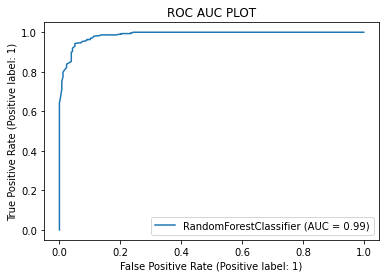

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

Final Accuracy is 94% and AUC is 99% which is a satisfactory result.

### Saving the model in pickel format

In [106]:
import pickle
filename = 'Wine_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))